In [33]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [34]:
df=pd.read_excel('Book1.xlsx')
df

,ФИО,Дата рождения,Дата поступления,Должность,Оклад
0,Иванов Петр Сергеевич,1985-03-15,2010-05-10,Инженер,75000
1,Петрова Анна Ивановна,1990-07-23,2015-08-15,Бухгалтер,68000
2,Сидоров Алексей Дмитриевич,1978-11-05,2005-01-20,Начальник отдела,120000
3,Кузнецова Елена Андреевна,1988-02-12,2012-03-03,Маркетолог,82000
4,Смирнов Дмитрий Владимирович,1982-09-30,2008-06-17,Программист,95000
5,Попова Мария Алексеевна,1995-05-08,2018-09-22,Менеджер,58000
6,Васильев Николай Петрович,1975-12-19,2000-11-11,Директор,180000
7,Михайлова Ольга Дмитриевна,1980-06-25,2006-04-05,Аналитик,88000
8,Павлов Андрей Николаевич,1992-08-14,2016-01-30,Тестировщик,65000
9,Соколова Наталья Сергеевна,1987-10-03,2013-07-12,HR-менеджер,72000


In [35]:
df['Дата рождения'] = pd.to_datetime(df['Дата рождения'], format='%d.%m.%Y')
df['Дата поступления'] = pd.to_datetime(df['Дата поступления'], format='%d.%m.%Y')

In [36]:
current_date = datetime.now()

In [37]:
df['Возраст'] = (current_date - df['Дата рождения']).dt.days // 365
df['Стаж'] = (current_date - df['Дата поступления']).dt.days // 365
df

,ФИО,Дата рождения,Дата поступления,Должность,Оклад,Возраст,Стаж
0,Иванов Петр Сергеевич,1985-03-15,2010-05-10,Инженер,75000,40,15
1,Петрова Анна Ивановна,1990-07-23,2015-08-15,Бухгалтер,68000,35,10
2,Сидоров Алексей Дмитриевич,1978-11-05,2005-01-20,Начальник отдела,120000,47,21
3,Кузнецова Елена Андреевна,1988-02-12,2012-03-03,Маркетолог,82000,38,13
4,Смирнов Дмитрий Владимирович,1982-09-30,2008-06-17,Программист,95000,43,17
5,Попова Мария Алексеевна,1995-05-08,2018-09-22,Менеджер,58000,30,7
6,Васильев Николай Петрович,1975-12-19,2000-11-11,Директор,180000,50,25
7,Михайлова Ольга Дмитриевна,1980-06-25,2006-04-05,Аналитик,88000,45,19
8,Павлов Андрей Николаевич,1992-08-14,2016-01-30,Тестировщик,65000,33,10
9,Соколова Наталья Сергеевна,1987-10-03,2013-07-12,HR-менеджер,72000,38,12


In [38]:
def calculate_bonus(years):
    if years < 5:
        return 0.10
    elif years > 10:
        return 0.20
    else:  # от 5 до 10 лет
        return 0.15

In [39]:
df['Надбавка'] = df['Стаж'].apply(calculate_bonus)
df['Оплата труда'] = df['Оклад'] * (1 + df['Надбавка'])
df

,ФИО,Дата рождения,Дата поступления,Должность,Оклад,Возраст,Стаж,Надбавка,Оплата труда
0,Иванов Петр Сергеевич,1985-03-15,2010-05-10,Инженер,75000,40,15,0.20,90000.0
1,Петрова Анна Ивановна,1990-07-23,2015-08-15,Бухгалтер,68000,35,10,0.15,78200.0
2,Сидоров Алексей Дмитриевич,1978-11-05,2005-01-20,Начальник отдела,120000,47,21,0.20,144000.0
3,Кузнецова Елена Андреевна,1988-02-12,2012-03-03,Маркетолог,82000,38,13,0.20,98400.0
4,Смирнов Дмитрий Владимирович,1982-09-30,2008-06-17,Программист,95000,43,17,0.20,114000.0
5,Попова Мария Алексеевна,1995-05-08,2018-09-22,Менеджер,58000,30,7,0.15,66700.0
6,Васильев Николай Петрович,1975-12-19,2000-11-11,Директор,180000,50,25,0.20,216000.0
7,Михайлова Ольга Дмитриевна,1980-06-25,2006-04-05,Аналитик,88000,45,19,0.20,105600.0
8,Павлов Андрей Николаевич,1992-08-14,2016-01-30,Тестировщик,65000,33,10,0.15,74750.0
9,Соколова Наталья Сергеевна,1987-10-03,2013-07-12,HR-менеджер,72000,38,12,0.20,86400.0


In [40]:
avg_payment = df['Оплата труда'].mean()
print(f"5. Средняя оплата труда: {avg_payment:.2f}")

5. Средняя оплата труда: 107405.00


In [41]:
less_than_avg = df[df['Оплата труда'] < avg_payment].shape[0]
print(f"6. Сотрудников с оплатой меньше средней: {less_than_avg}")

6. Сотрудников с оплатой меньше средней: 7


In [42]:
min_payment = df['Оплата труда'].min()
max_payment = df['Оплата труда'].max()
print(f"7. Минимальная оплата: {min_payment:.2f}")
print(f"   Максимальная оплата: {max_payment:.2f}")

7. Минимальная оплата: 66700.00
   Максимальная оплата: 216000.00


In [43]:
avg_by_position = df.groupby('Должность')['Оплата труда'].mean().round(2).reset_index()
avg_by_position.columns = ['Должность', 'Средняя оплата']
print("\n8. Средняя оплата по должностям:")
print(avg_by_position.to_string(index=False))
df


8. Средняя оплата по должностям:
       Должность  Средняя оплата
     HR-менеджер         86400.0
        Аналитик        105600.0
       Бухгалтер         78200.0
        Директор        216000.0
         Инженер         90000.0
      Маркетолог         98400.0
        Менеджер         66700.0
Начальник отдела        144000.0
     Программист        114000.0
     Тестировщик         74750.0


,ФИО,Дата рождения,Дата поступления,Должность,Оклад,Возраст,Стаж,Надбавка,Оплата труда
0,Иванов Петр Сергеевич,1985-03-15,2010-05-10,Инженер,75000,40,15,0.20,90000.0
1,Петрова Анна Ивановна,1990-07-23,2015-08-15,Бухгалтер,68000,35,10,0.15,78200.0
2,Сидоров Алексей Дмитриевич,1978-11-05,2005-01-20,Начальник отдела,120000,47,21,0.20,144000.0
3,Кузнецова Елена Андреевна,1988-02-12,2012-03-03,Маркетолог,82000,38,13,0.20,98400.0
4,Смирнов Дмитрий Владимирович,1982-09-30,2008-06-17,Программист,95000,43,17,0.20,114000.0
5,Попова Мария Алексеевна,1995-05-08,2018-09-22,Менеджер,58000,30,7,0.15,66700.0
6,Васильев Николай Петрович,1975-12-19,2000-11-11,Директор,180000,50,25,0.20,216000.0
7,Михайлова Ольга Дмитриевна,1980-06-25,2006-04-05,Аналитик,88000,45,19,0.20,105600.0
8,Павлов Андрей Николаевич,1992-08-14,2016-01-30,Тестировщик,65000,33,10,0.15,74750.0
9,Соколова Наталья Сергеевна,1987-10-03,2013-07-12,HR-менеджер,72000,38,12,0.20,86400.0


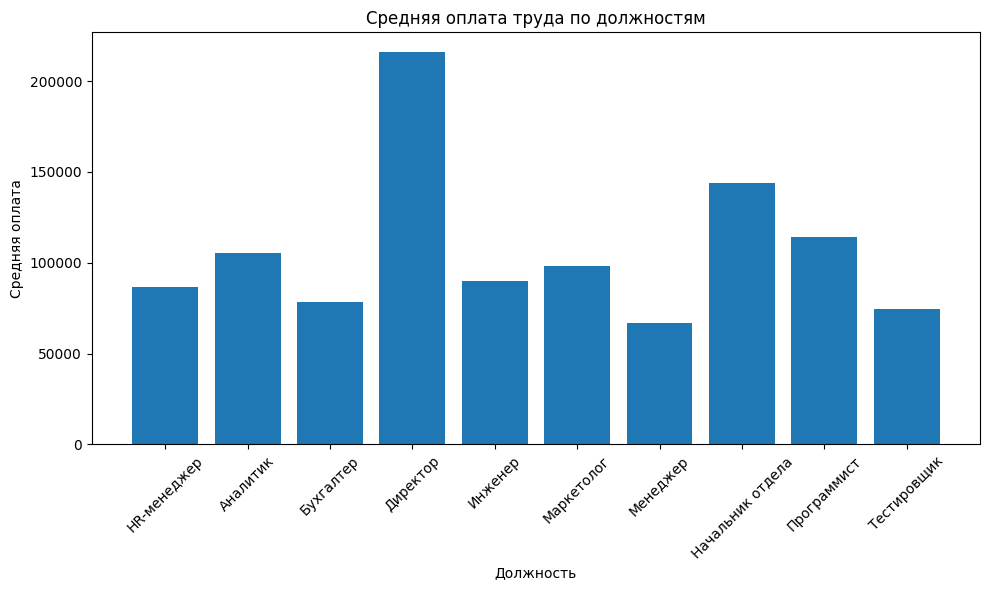

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(avg_by_position['Должность'], avg_by_position['Средняя оплата'])
plt.xlabel('Должность')
plt.ylabel('Средняя оплата')
plt.title('Средняя оплата труда по должностям')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()